In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x_train = np.random.randn(1000)
e = np.random.randn(1000) # noise
y_train = x + .6*e

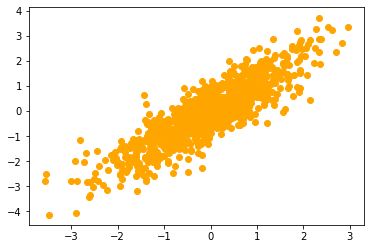

In [23]:
plt.scatter(x, y, c = 'orange');

In [63]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [64]:
print(x.shape, y.shape)

(1000, 1) (1000, 1)


In [151]:
class AdamOptimization:
    
    def parameter_initialization(self, shape_x):
        
        # Adam Optimization
        self.v_dw = 0
        self.v_db = 0
        self.s_dw = 0
        self.s_db = 0
        
        self.w = np.random.randn(shape_x, 1)*0.1
        self.b  = 0.0
        return self.w, self.b
    
    def hypothesis(self, x, w, b):
        return np.dot(x, w) + b    
    
    def compute_loss(self, x, y, w, b):
        m = x.shape[0]
        y_ = self.hypothesis(x, w, b)
        loss = ((y_train - y_)**2)/2
        return loss/m
    
    
    def base_grads(self, x, y, w, b):
        h = self.hypothesis(x, w, b)
        dw = np.mean((h - y)*x)
        db = np.mean((h - y))
        return dw, db
    
    def adam_grads(self, dw, db, epoch_number = 1, beta_1 = 0.9, beta_2 = 0.999,  epsilon = 1e-8):
        
        v_dw = self.v_dw
        v_db = self.v_db
        
        s_dw = self.s_dw
        s_db = self.s_db
        
        
        #print('momentum')
        # momentum
        v_dw = beta_1*v_dw + (1 - beta_1)*dw
        v_db = beta_1*v_db + (1 - beta_1)*db
        
        #print('rms prop')
        # rms prop
        s_dw = beta_2*s_dw + (1 - beta_2)*(dw**2)
        s_db = beta_2*s_db + (1 - beta_2)*(db**2)
        
        
        #print(v_dw, s_dw)
        
        
        #print('correction')
        # corrected momentum and rms prop
        v_dw_corrected = v_dw/(1 - beta_1**epoch_number)
        v_db_corrected = v_db/(1 - beta_1**epoch_number)
        s_dw_corrected = s_dw/(1 - beta_2**epoch_number)
        s_db_corrected = s_db/(1 - beta_2**epoch_number)
        
        
        print(v_dw_corrected, s_db_corrected)
        
        print('final gradients')
        # calculate the gradients
        grad_w = v_dw_corrected/(np.sqrt(s_dw_corrected + epsilon))
        grad_b = v_dw_corrected/(np.sqrt(s_db_corrected + epsilon))
        print(grad_w, grad_b)
        print('hello')
        
#         self.v_dw = v_dw
#         self.v_db = v_db 

#         self.s_dw = s_dw 
#         self.s_db = s_db 
    
    
    def train(self, x, y, learning_rate = 0.001, epochs = 200, batch_size = 1):
        self.parameter_initialization(x.shape[1])
        
        loss = []
        w, b = self.w, self.b
        
        for epoch in range(epochs):
            print(epoch)
            dw, db = self.base_grads(x, y, w, b)
            print(dw, db)
            print('hello')
            grads_w, grads_b = self.adam_grads(dw, db, epoch + 1)
            w = w - learning_rate*grads_w
            b = b - learning_rate*grads_b
            loss.append(self.compute_loss(x, y, w, b))
            
        
        self.w, self.b = w, b
        
        return loss
        
        
    
    def predict(self, x_test):
        y_ = self.hypothesis(x_test, self.w, self.b)
        return y_

        

In [152]:
model = AdamOptimization()

In [153]:
loss = model.train(x, y)

0
-0.8942677570588401 0.03193519600156493
hello
-0.8942677570588401 0.0010198567436583686
final gradients
-0.9999999937477713 -28.00243883788981
hello


TypeError: 'NoneType' object is not iterable

In [86]:
model.parameter_initialization(x.shape[1])

(array([[0.0734178]]), 0.0)

In [87]:
model.base_grads(x, y, model.w, model.b)

(-0.9946440935140165, 0.03547234204321761)